<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/tweet_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
dataset='/content/drive/MyDrive/Tweets.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [23]:
df.drop(['textID','text'],axis=1)

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
...,...,...
27477,", don`t force",negative
27478,Yay good for both of you.,positive
27479,But it was worth it ****.,positive
27480,hiii,positive


In [34]:
df

,textID,text,selected_text,sentiment,label
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
...,...,...,...,...,...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2
27480,ed167662a6,hlo all hi,hiii,positive,2


In [24]:
df.loc[df['selected_text'].isnull(), 'selected_text'] = 'No text'

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['sentiment'])

In [7]:
df.head()

,textID,text,selected_text,sentiment,label
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0


In [36]:
df.drop(['textID','text'],axis=1,inplace=True)

In [37]:
df

,selected_text,sentiment,label
0,"I`d have responded, if I were going",neutral,1
1,Sooo SAD,negative,0
2,bullying me,negative,0
3,leave me alone,negative,0
4,"Sons of ****,",negative,0
...,...,...,...
27477,", don`t force",negative,0
27478,Yay good for both of you.,positive,2
27479,But it was worth it ****.,positive,2
27480,hiii,positive,2


In [39]:
df.drop(['sentiment'],axis=1,inplace=True)

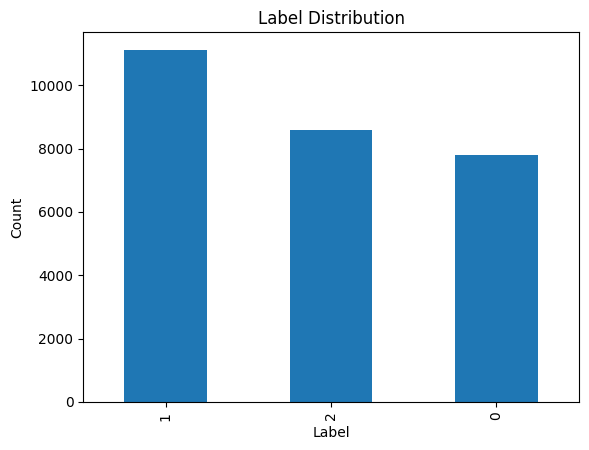

In [9]:
import matplotlib.pyplot as plt


label_counts = df['label'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# Display the plot

plt.show()

In [40]:
df

,selected_text,label
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0
...,...,...
27477,", don`t force",0
27478,Yay good for both of you.,2
27479,But it was worth it ****.,2
27480,hiii,2


In [10]:
import nltk
nltk.download(['punkt','wordnet']) #lexical db fro english lang #punkt-tokenizer model for various lang
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['selected_text'], df['label'], test_size=0.2, random_state=42)

In [42]:
X_train

5908                                           have funnn!
11253    _Rankin yep to you buddy  long time no talk, h...
9463                                              And you!
26628                                It`s nice to see you!
22729                                      f irresponsible
                               ...                        
21575    STAR TREK WAS PURE AWESOME! LOVE IT!!! <3333  ...
5390     Will be going to Indiana Baptist Sunday, Pray ...
860      is sitting thru the boring bits in Titanic wai...
15795                                      Missed the play
23654                                                tired
Name: selected_text, Length: 21985, dtype: object

In [29]:
y_train

5908     2
11253    1
9463     1
26628    2
22729    0
        ..
21575    2
5390     1
860      1
15795    0
23654    0
Name: label, Length: 21985, dtype: int64

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [30]:
from nltk.corpus.reader import wordnet
def get_wordnet_pos_tag(word):
  tag=nltk.pos_tag([word])[0][1][0]
  tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
  }
  return tag_dict.get(tag,wordnet.NOUN) #default tag -POS tag - when the word not classifies as any predefined POS

def tokenize_lemma(text):
  tokens=nltk.word_tokenize(text)
  lemm=WordNetLemmatizer()

  clean_tokens=[]
  for tok in tokens:
    lemm.lemmatize(tok,get_wordnet_pos_tag(tok))
    clean_tokens.append(lemm.lemmatize(tok,get_wordnet_pos_tag(tok)))

  return clean_tokens

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(tokenizer=tokenize_lemma)

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf=TfidfTransformer()

In [43]:
#train our model
x_train_count=vect.fit_transform(X_train)
x_train_tfidf=tfidf.fit_transform(x_train_count)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

In [47]:
x_test_tfidf = tfidf.transform(vect.transform(X_test))

In [48]:
y_pred = dt_classifier.predict(x_test_tfidf)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1582
           1       0.76      0.75      0.75      2250
           2       0.77      0.75      0.76      1665

    accuracy                           0.74      5497
   macro avg       0.74      0.74      0.74      5497
weighted avg       0.74      0.74      0.74      5497



In [50]:
x = df.drop(['label'], axis = 1)
x
y = df['label']
x

,selected_text
0,"I`d have responded, if I were going"
1,Sooo SAD
2,bullying me
3,leave me alone
4,"Sons of ****,"
...,...
27477,", don`t force"
27478,Yay good for both of you.
27479,But it was worth it ****.
27480,hiii


In [54]:
dt_classifier.score(tfidf.transform(vect.transform(df['selected_text'])), df['label']) * 100

94.60010188487009

In [55]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [2]:
import gradio as gr

ModuleNotFoundError: ignored

In [1]:
def predict(text):
    print(text)
    output = dt_classifier.predict(tfidf.transform(vect.transform([text])))
    print(output)
    if output == 0:
      return 'Negative'
    elif output == 2:
      return 'Positive'
    else:
      return 'Neutral'
input_text = gr.inputs.Textbox(lines=5, label="Comment")
output_text = gr.outputs.Textbox(label="Type of comment")

iface = gr.Interface(fn=predict, inputs=input_text, outputs=output_text)

iface.launch(debug=True)

NameError: ignored